# 鹿検知コンペ測量見積もり

## 目的
10月に開催される鹿検知コンペの鹿ダミー位置の測量の誤差を見積もる。

## ドローン機体仕様
- camera: DJI X5S
- 焦点距離：45mm
- CCDイメージサイズ(HxW)：13.0mm x 17.3mm
- CCDイメージ画素数：縦3956画素、横5280画素

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import gistool
%matplotlib notebook

In [64]:
# 写真すべての高度を抽出して、画像と比較する。132は地上レベル
file = r"data/DJI_0132.JPG"
gps0 = gistool.get_GPS(file)
g0 = gps0['alt']

In [65]:
import glob
lst = glob.glob('data/*.JPG')
lst

['data\\DJI_0132.JPG',
 'data\\DJI_0133.JPG',
 'data\\DJI_0135.JPG',
 'data\\DJI_0136.JPG',
 'data\\DJI_0137.JPG',
 'data\\DJI_0140.JPG',
 'data\\DJI_0141.JPG']

In [66]:
data = []
for f in lst:
    gps = gistool.get_GPS(f)
    gps['fname'] = f
    gps['rel_alt'] = gps['alt'] - g0
    data.append(gps)
data

[{'alt': 213.796,
  'fname': 'data\\DJI_0132.JPG',
  'lat': 37.286447,
  'lon': 139.473903,
  'rel_alt': 0.0},
 {'alt': 223.692,
  'fname': 'data\\DJI_0133.JPG',
  'lat': 37.284472,
  'lon': 139.473261,
  'rel_alt': 9.896000000000015},
 {'alt': 264.592,
  'fname': 'data\\DJI_0135.JPG',
  'lat': 37.284183,
  'lon': 139.471042,
  'rel_alt': 50.79599999999999},
 {'alt': 317.492,
  'fname': 'data\\DJI_0136.JPG',
  'lat': 37.286258,
  'lon': 139.466164,
  'rel_alt': 103.69600000000003},
 {'alt': 363.592,
  'fname': 'data\\DJI_0137.JPG',
  'lat': 37.286433,
  'lon': 139.465917,
  'rel_alt': 149.796},
 {'alt': 363.392,
  'fname': 'data\\DJI_0140.JPG',
  'lat': 37.286567,
  'lon': 139.465942,
  'rel_alt': 149.596},
 {'alt': 363.792,
  'fname': 'data\\DJI_0141.JPG',
  'lat': 37.300619,
  'lon': 139.450917,
  'rel_alt': 149.99599999999998}]

In [67]:
data_df = pd.DataFrame(data)
data_df

,alt,fname,lat,lon,rel_alt
0,213.796,data\DJI_0132.JPG,37.286447,139.473903,0.000
1,223.692,data\DJI_0133.JPG,37.284472,139.473261,9.896
2,264.592,data\DJI_0135.JPG,37.284183,139.471042,50.796
3,317.492,data\DJI_0136.JPG,37.286258,139.466164,103.696
4,363.592,data\DJI_0137.JPG,37.286433,139.465917,149.796
5,363.392,data\DJI_0140.JPG,37.286567,139.465942,149.596
6,363.792,data\DJI_0141.JPG,37.300619,139.450917,149.996


## 座標の変換
### 画像内座標から世界測地系への変換

<IPython.core.display.Javascript object>


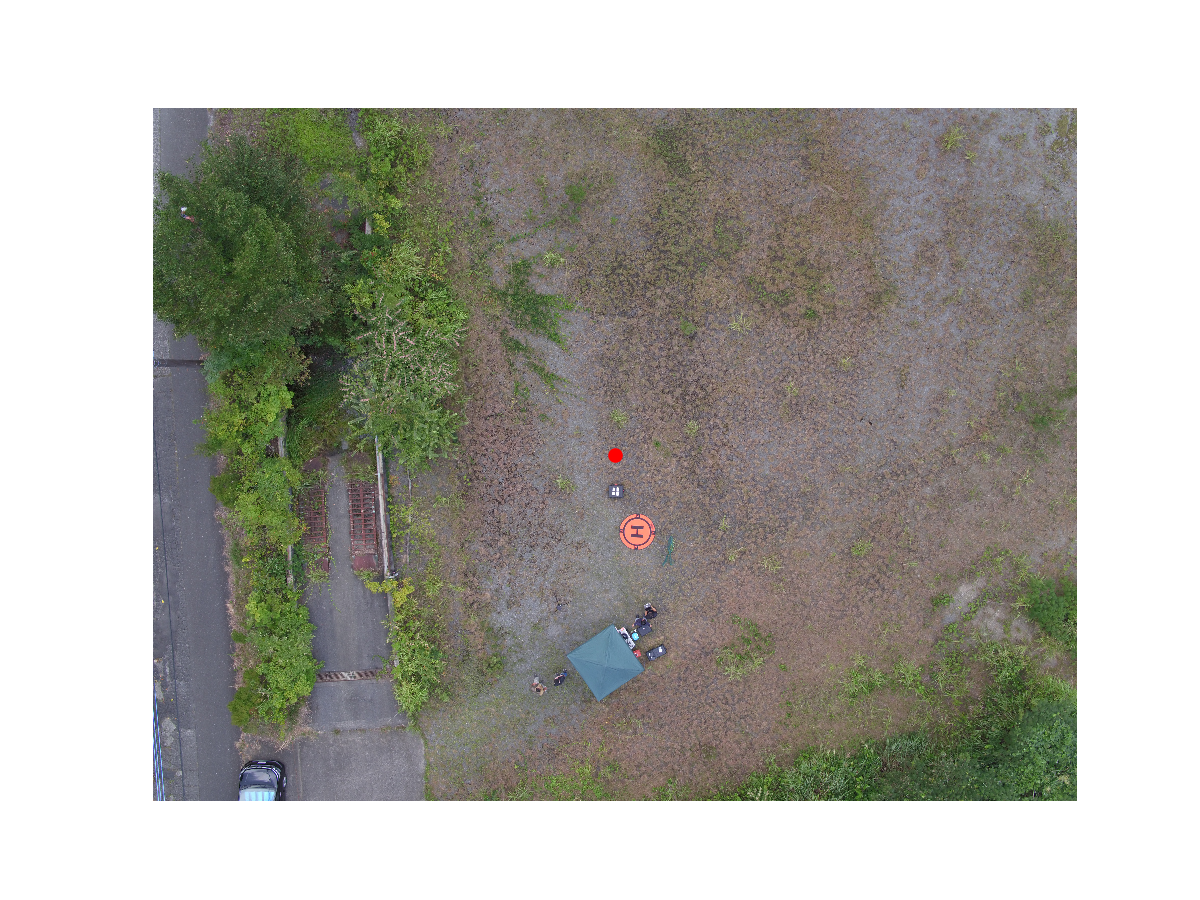

In [19]:
# 配列に画像を読み込む
impath = r'data/DJI_0135.JPG'
im = np.array(Image.open(impath))
high, wid = im.shape[:2]

# 画像を表示する
fig = plt.figure(figsize=(8,6))
plt.imshow(im)
plt.axis('off')
plt.plot(wid/2, high/2,'ro') 
plt.show()

<IPython.core.display.Javascript object>


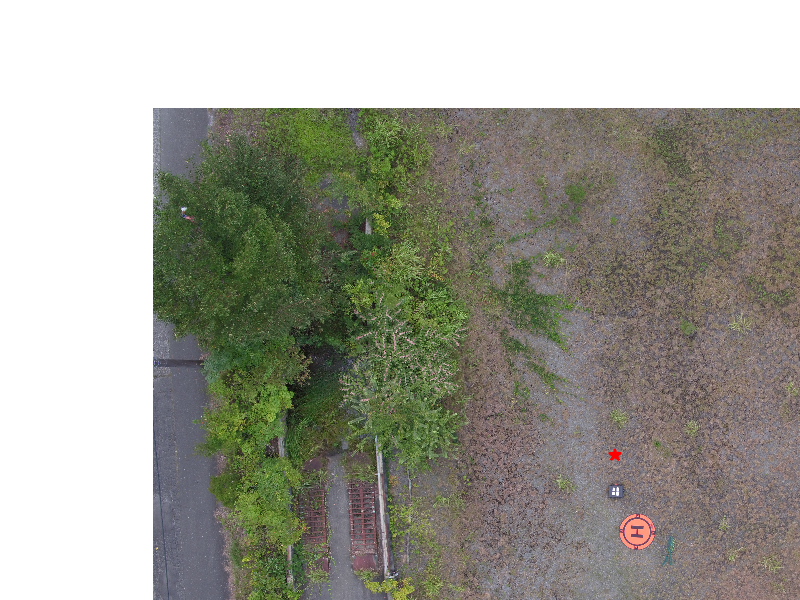

In [94]:
class clicker_class(object):
    def __init__(self, ax):
        self.canvas = ax.get_figure().canvas
        # self.cid = None
        self.pt_lst = []
        self.pt_plot = ax.plot([], [], marker='o', color='r',
                               linestyle='none', zorder=5)[0]
        # self.pix_err = pix_err
        # self.cid = self.canvas.mpl_connect('button_press_event',
        #                                        self.click_event)
        self.connect()

    def connect(self):
        self.cidbutton = self.canvas.mpl_connect('button_press_event',
                                                self.click_event)
        self.cidkeypress = self.canvas.mpl_connect('key_press_event', 
                                                self.press)

    def press(self, event):
        print('press', event.key)
        # sys.stdout.flush()

    def click_event(self, event):
        ''' Extracts locations from the user'''
        print(event)
        # if event.key == 'shift':
        #     self.pt_lst = []
        #     return
        # if event.xdata is None or event.ydata is None:
        #     return
        if event.button == 1:
            self.pt_lst.append((event.xdata, event.ydata))
        elif event.button == 3:
            self.remove_pt((event.xdata, event.ydata))

        self.redraw()

    def remove_pt(self, loc):
        if len(self.pt_lst) > 0:
            self.pt_lst.pop(np.argmin(map(lambda x:
                                          np.sqrt((x[0] - loc[0]) ** 2 +
                                                  (x[1] - loc[1]) ** 2),
                                          self.pt_lst)))

    def redraw(self):
        if len(self.pt_lst) > 0:
            x, y = zip(*self.pt_lst)
        else:
            x, y = [], []
        self.pt_plot.set_xdata(x)
        self.pt_plot.set_ydata(y)
        self.canvas.draw()

impath = r'data/DJI_0135.JPG'
im = np.array(Image.open(impath))
high, wid = im.shape[:2]

# 画像を表示する
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.imshow(im)
plt.axis('off')
plt.plot(wid/2, high/2,'r*') 

cc = clicker_class(ax)
plt.show()  

In [95]:
cc.pt_lst

[(4126.4869368912341, 411.70771611201326)]

In [96]:
df = pd.DataFrame(cc.pt_lst, columns= ['xdata', 'ydata'])
df

,xdata,ydata
0,4126.486937,411.707716


In [97]:
high, wid

(3456, 4608)

In [98]:
x_center = wid/2
y_center = high/2
x_center, y_center

(2304.0, 1728.0)

In [126]:
x, y = cc.pt_lst[0]
x,y

(4126.4869368912341, 411.70771611201326)

In [100]:
height = 50


In [101]:
ccd_num_v = 3456 # num of ccd images vertical
ccd_num_h = 4608 # num of ccd images horizontal

ccd_size_v = 13		# vertical ccd image size [mm]
ccd_size_h = 17.3	# horizontal ccd image size [mm]

f_length = 25 # focal length [mm]

ccd_pitch_v = float(ccd_size_v/ccd_num_v)
ccd_pitch_h = float(ccd_size_h/ccd_num_h)

img_size_v = ccd_size_v/float(f_length)*height
img_size_h = ccd_size_h/float(f_length)*height

print("Image size height [m]: {:.1f}".format(img_size_v))
print("Image size width [m]: {:.1f}".format(img_size_h))

Image size height [m]: 26.0
Image size width [m]: 34.6


In [102]:
xd = img_size_h/ccd_num_h * (x - x_center)
yd = img_size_v/ccd_num_v * (y - y_center)

In [47]:
lat_deg_tokyo = 139.767052
lon_deg_tokyo = 35.681167
dms= deg2dms(lon_deg_tokyo)
result = dms2deg(dms)
print(lon_deg_tokyo, dms, result)

In [103]:
from math import modf
def deg2dms(deg_num):
    # 緯度・経度をDEG形式からDMS形式へ変換する
    res, deg = modf(deg_num)
    res, min = modf(res * 60)
    sec = res * 60
    return int(deg), int(min), round(sec, 3)

def dms2deg(dms_num):
    deg_num = dms_num[0] + dms_num[1]/60.0 + dms_num[2]/3600.0
    return round(deg_num, 6)

In [104]:
lat_ex = data_df['lat'].iloc[2]
lon_ex = data_df['lon'].iloc[2]
lat_ex, lon_ex

(37.284182999999999, 139.47104200000001)

In [70]:
lat_dms_ex = deg2dms(lat_ex)
lon_dms_ex = deg2dms(lon_ex)
lat_dms_ex, lon_dms_ex

((37, 17, 3.059), (139, 28, 15.751))

In [77]:
from math import pi, cos, sin
pi

3.141592653589793

In [105]:
POLE_RADIUS = 6356752.314
JAPAN_LATITUDE = 35
EQUATOR_RADIUS = 6378137
lon_degree = ( 360 * 1000 ) / ( 2 * pi * ( EQUATOR_RADIUS * cos(JAPAN_LATITUDE * pi / 180.0) ) )
lon_degree
# => 0.010966404715491394

In [108]:
yd_deg = yd / POLE_RADIUS * 180 / pi
lat_result = lat_ex - yd_deg
deg2dms(lat_result)

(37, 17, 3.38)

In [112]:
xd_deg = xd * 180 / (pi * EQUATOR_RADIUS * cos(JAPAN_LATITUDE * pi / 180.0))
lon_result = lon_ex + xd_deg
deg2dms(lon_result)

(139, 28, 16.291)

In [110]:
xd, yd

(13.684472225789214, -9.9026618579536034)

In [113]:
plt.savefig('sample.jpg')

In [ ]:
xd, yd

In [117]:
x = [1, 2, 3]
y = [4, 5, 6]
zipped = zip(x, y)
list(zipped)

[(1, 4), (2, 5), (3, 6)]

<IPython.core.display.Javascript object>


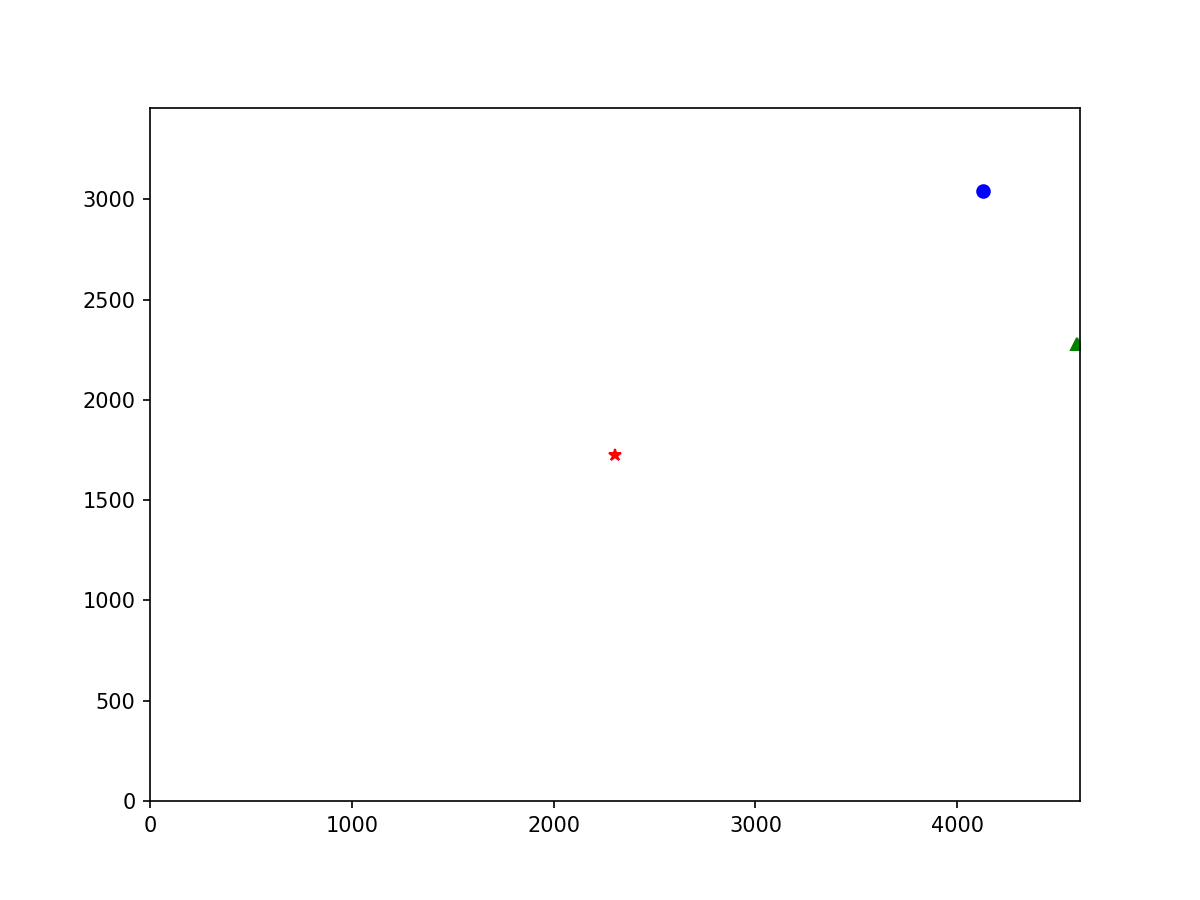

In [133]:
# 画像の方位角（上向きの角度。真北を基準として反時計回りに角度表示）
img_dir = 10

x2 = cos(img_dir * pi / 180.0) * x + sin(img_dir * pi / 180.0) * (high - y)
y2 = -sin(img_dir * pi / 180.0) * x + cos(img_dir * pi / 180.0) * (high - y)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlim([0,wid])
plt.ylim([0,high])
# plt.axis('off')
plt.plot(wid/2, high/2,'r*') 
plt.plot(x,high-y, 'bo')
plt.plot(x2, y2, 'g^')
plt.show()